In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import math
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')
num_companies = len(df)

In [93]:
df.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

In [ ]:
num_jobs_Queends = df[df['City']=='Queens']['Job created'].sum()

In [ ]:
num_uniques_emails = df['company email'].drop_duplicates().count()

- Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [ ]:
result = []
for i in range(len(pd.DataFrame(df.groupby(by='NTA')))):
    if  pd.DataFrame(df.groupby(by='NTA')).iloc[i,1].shape[0]>5:
        NTA = pd.DataFrame(df.groupby(by='NTA'))[0][i]
        mean_avg = pd.DataFrame(df.groupby(by='NTA')).iloc[i,1]['Total Savings'].mean()
        jobs_created = pd.DataFrame(df.groupby(by='NTA')).iloc[i,1]['Job created'].sum()
        result.append([NTA, mean_avg, jobs_created])

- scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

- histogram of the log of the average total savings.

- line plot of the total jobs created for each month.

In [ ]:
plt.scatter(df['Job created'], df['Savings from beginning receiving benefits'])
plt.yscale('log')

In [ ]:
plt.hist(df['Total Savings'])
plt.yscale('log')

In [112]:
df.index = pd.to_datetime(df['Effective Date'],format='%m/%d/%Y')
AVG_month = pd.DataFrame( df.groupby(by=[df.index.month, df.index.year]) )
AVG = []
date = []
for i in range(len(AVG_month)):
    AVG.append( AVG_month.iloc[i,1]['Job created'].sum() )
    date.append( AVG_month.iloc[i,0] )

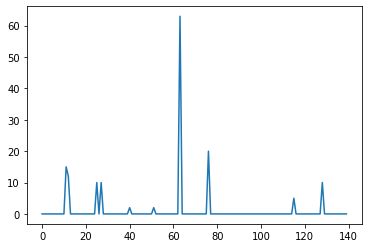

In [127]:
plt.plot(AVG)